# Dataset being compared
The original 2023-2024 Job Postings dataset is being compared to [2024 Jobs & Skills ](https://www.kaggle.com/datasets/asaniczka/1-3m-linkedin-jobs-and-skills-2024)dataset.

# Data Cleaning (Linkedin Job Postings)

In [ ]:
import pandas as pd
import numpy as np
!pip install squarify

In [ ]:
# Load and check CSV
postings_df = pd.read_csv("linkedin_job_postings.csv")
print(postings_df.shape)
print(postings_df.info())
postings_df.isna().sum()

(1348454, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348454 entries, 0 to 1348453
Data columns (total 14 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   job_link             1348454 non-null  object
 1   last_processed_time  1348454 non-null  object
 2   got_summary          1348454 non-null  object
 3   got_ner              1348454 non-null  object
 4   is_being_worked      1348454 non-null  object
 5   job_title            1348454 non-null  object
 6   company              1348443 non-null  object
 7   job_location         1348435 non-null  object
 8   first_seen           1348454 non-null  object
 9   search_city          1348454 non-null  object
 10  search_country       1348454 non-null  object
 11  search_position      1348454 non-null  object
 12  job_level            1348454 non-null  object
 13  job_type             1348454 non-null  object
dtypes: object(14)
memory usage: 144.0+ MB
None


,0
job_link,0
last_processed_time,0
got_summary,0
got_ner,0
is_being_worked,0
job_title,0
company,11
job_location,19
first_seen,0
search_city,0


In [ ]:
# Drop missing rows
postings_df_cleaned = postings_df.dropna(subset=['job_link', 'last_processed_time', 'got_summary', 'got_ner', 'is_being_worked', 'job_title', 'company', 'job_location', 'first_seen',
       'search_city', 'search_country', 'search_position', 'job_level',
       'job_type'])
print(postings_df_cleaned.isnull().sum())

job_link               0
last_processed_time    0
got_summary            0
got_ner                0
is_being_worked        0
job_title              0
company                0
job_location           0
first_seen             0
search_city            0
search_country         0
search_position        0
job_level              0
job_type               0
dtype: int64


# Data Cleaning (Job Skills)

In [ ]:
# Load and check CSV
skills_df = pd.read_csv("job_skills.csv")
print(skills_df.shape)
print(skills_df.info())
skills_df.isna().sum()

(1296381, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296381 entries, 0 to 1296380
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   job_link    1296381 non-null  object
 1   job_skills  1294296 non-null  object
dtypes: object(2)
memory usage: 19.8+ MB
None


,0
job_link,0
job_skills,2085


In [ ]:
# Drop missing rows
skills_df_cleaned = skills_df.dropna(subset=['job_link', 'job_skills'])
print(skills_df_cleaned.isnull().sum())

job_link      0
job_skills    0
dtype: int64


# Merge Both Datasets into a Single Dataset

In [ ]:
# Merge both datasets at the column 'job_link'
merged_df = postings_df_cleaned.merge(skills_df_cleaned, on='job_link', how='left')

In [ ]:
# Check Merged Dataset
print(merged_df.shape)
print(merged_df.head())
print(merged_df.isna().sum())

(1348424, 15)
                                            job_link  \
0  https://www.linkedin.com/jobs/view/account-exe...   
1  https://www.linkedin.com/jobs/view/registered-...   
2  https://www.linkedin.com/jobs/view/restaurant-...   
3  https://www.linkedin.com/jobs/view/independent...   
4  https://www.linkedin.com/jobs/view/group-unit-...   

             last_processed_time got_summary got_ner is_being_worked  \
0   2024-01-21 07:12:29.00256+00           t       t               f   
1   2024-01-21 07:39:58.88137+00           t       t               f   
2  2024-01-21 07:40:00.251126+00           t       t               f   
3  2024-01-21 07:40:00.308133+00           t       t               f   
4  2024-01-19 09:45:09.215838+00           f       f               f   

                                           job_title  \
0  Account Executive - Dispensing (NorCal/Norther...   
1                 Registered Nurse - RN Care Manager   
2               RESTAURANT SUPERVISOR - THE FORK

### Handling Missing Values for 'job_skills'

In [ ]:
# 1. Drop rows where 'job_skills' is missing or empty
merged_df = merged_df[merged_df['job_skills'].notna()]      # remove NaN
merged_df = merged_df[merged_df['job_skills'].str.strip() != ""]  # remove empty strings

# 2. Clean text columns for consistency
text_cols = [
    'job_title', 'company', 'job_location',
    'search_city', 'search_country', 'search_position',
    'job_level', 'job_type'
]

for col in text_cols:
    merged_df[col] = merged_df[col].astype(str).str.strip().str.title()

# 3. Clean and split job skills
merged_df['job_skills'] = merged_df['job_skills'].str.strip()
merged_df['job_skills_list'] = merged_df['job_skills'].str.split(',')

# Strip spaces inside each list
merged_df['job_skills_list'] = merged_df['job_skills_list'].apply(
    lambda x: [skill.strip() for skill in x]
)

# Check results
print(merged_df[['job_title', 'job_skills', 'job_skills_list']].head())


                                           job_title  \
0  Account Executive - Dispensing (Norcal/Norther...   
1                 Registered Nurse - Rn Care Manager   
2               Restaurant Supervisor - The Forklift   
3                      Independent Real Estate Agent   
6                              Registered Nurse (Rn)   

                                          job_skills  \
0  Medical equipment sales, Key competitors, Term...   
1  Nursing, Bachelor of Science in Nursing, Maste...   
2  Restaurant Operations Management, Inventory Ma...   
3  Real Estate, Customer Service, Sales, Negotiat...   
6  Nursing, BSN, Medical License, Virtual RN, Nur...   

                                     job_skills_list  
0  [Medical equipment sales, Key competitors, Ter...  
1  [Nursing, Bachelor of Science in Nursing, Mast...  
2  [Restaurant Operations Management, Inventory M...  
3  [Real Estate, Customer Service, Sales, Negotia...  
6  [Nursing, BSN, Medical License, Virtual RN, Nu..

In [ ]:
# Preview of the merged dataset after cleaning
display(merged_df[['job_title', 'company', 'search_city', 'search_country', 'job_level', 'job_type', 'job_skills_list']]. head(10))

,job_title,company,search_city,search_country,job_level,job_type,job_skills_list
0,Account Executive - Dispensing (Norcal/Norther...,Bd,Coronado,United States,Mid Senior,Onsite,"[Medical equipment sales, Key competitors, Ter..."
1,Registered Nurse - Rn Care Manager,Trinity Health Mi,Grand Haven,United States,Mid Senior,Onsite,"[Nursing, Bachelor of Science in Nursing, Mast..."
2,Restaurant Supervisor - The Forklift,Wasatch Adaptive Sports,Tooele,United States,Mid Senior,Onsite,"[Restaurant Operations Management, Inventory M..."
3,Independent Real Estate Agent,Howard Hanna | Rand Realty,Pinehurst,United States,Mid Senior,Onsite,"[Real Estate, Customer Service, Sales, Negotia..."
6,Registered Nurse (Rn),Trinity Health Mi,Muskegon,United States,Mid Senior,Onsite,"[Nursing, BSN, Medical License, Virtual RN, Nu..."
7,Part Time- Hr Generalist,Creative Financial Staffing (Cfs),White Plains,United States,Mid Senior,Onsite,"[HR, Performance assessments, Interviews, Recr..."
8,Store Manager,B&M Retail,Slough,United Kingdom,Mid Senior,Onsite,"[Store Management, KPI Management, Team Leader..."
9,Engineering Project Coordinator,Shared Health-Soins Communs,Manitoba,Canada,Mid Senior,Onsite,"[AUTOCAD, MS Project, Building Code Compliance..."
10,Special Agent: Law/Legal Background,Federal Bureau Of Investigation (Fbi),Austin,United States,Associate,Onsite,"[FBI Special Agent, Law, Legal, Criminal Inves..."
11,"Manager, Site Operations",Icon Plc,Louisville,United States,Mid Senior,Onsite,"[Management Skills, Clinical Research, Clinica..."


# Data Visualisation

### Word Cloud (Popular Job Skills)

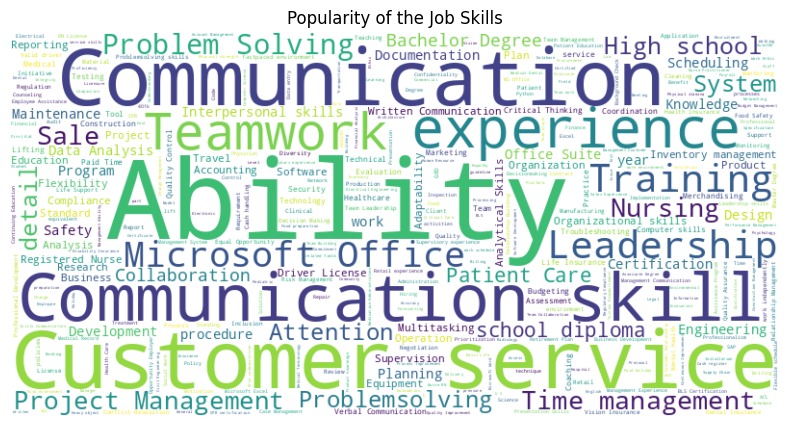

In [ ]:
# Flatten all skills into one list
all_skills = [skill for sublist in merged_df['job_skills_list'] for skill in sublist]

# Import WordCloud and Matplotlib
import random
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample skills to avoid memory issues
sample_size = min(500000, len(all_skills))
sample_skills = random.sample(all_skills, sample_size)
skills_text = " ".join(sample_skills)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=500).generate(skills_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popularity of the Job Skills")
plt.show()

### Top 10 In-Demand Skills

/tmp/ipython-input-558327155.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')


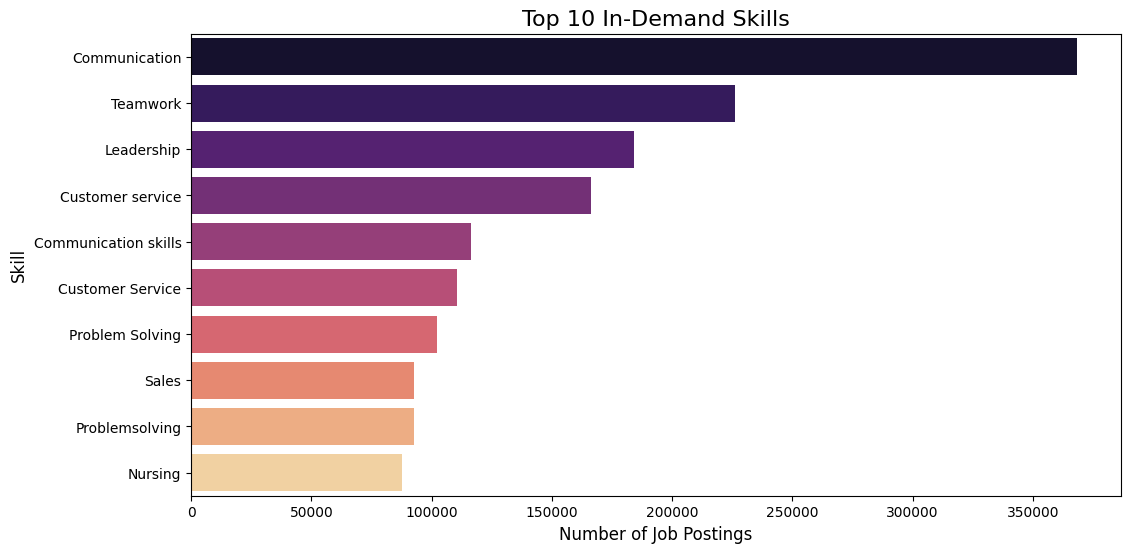

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the skills list into individual rows
all_skills = merged_df['job_skills_list'].explode()

# Count frequency of each skill
top_skills = all_skills.value_counts().head(10)

# Plot a horizontal bar chart
plt.figure(figsize=(12,6))
sns.barplot(x=top_skills.values, y=top_skills.index, palette='magma')
plt.title("Top 10 In-Demand Skills", fontsize=16)
plt.xlabel("Number of Job Postings", fontsize=12)
plt.ylabel("Skill", fontsize=12)
plt.show()

### Job Distribution by City

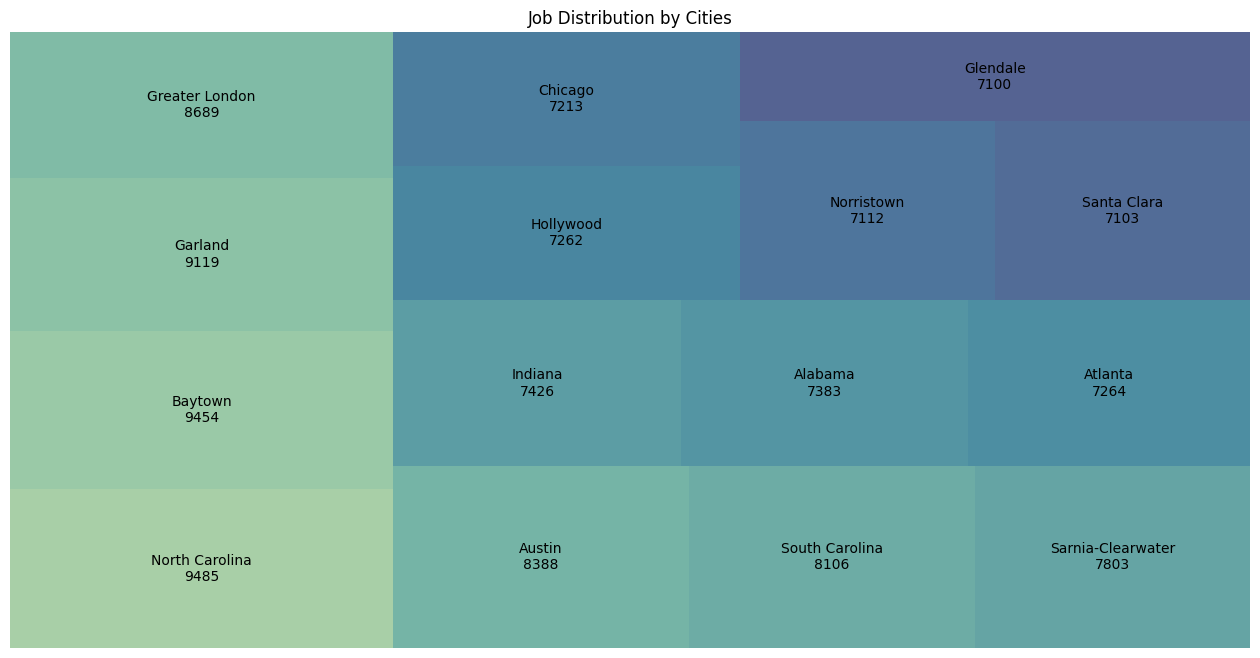

In [ ]:
import matplotlib.pyplot as plt
import squarify

# Count number of jobs per city
city_counts = merged_df['search_city'].value_counts().head(15)

# Get colour palette
colors = sns.color_palette('crest', len(city_counts))

# Plot tree map
plt.figure(figsize=(16,8))
squarify.plot(sizes=city_counts.values, label=[f"{city}\n{count}" for city, count in city_counts.items()], color=colors, alpha=0.8)
plt.title("Job Distribution by Cities")
plt.axis('off')
plt.show()


### Top Hiring Companies

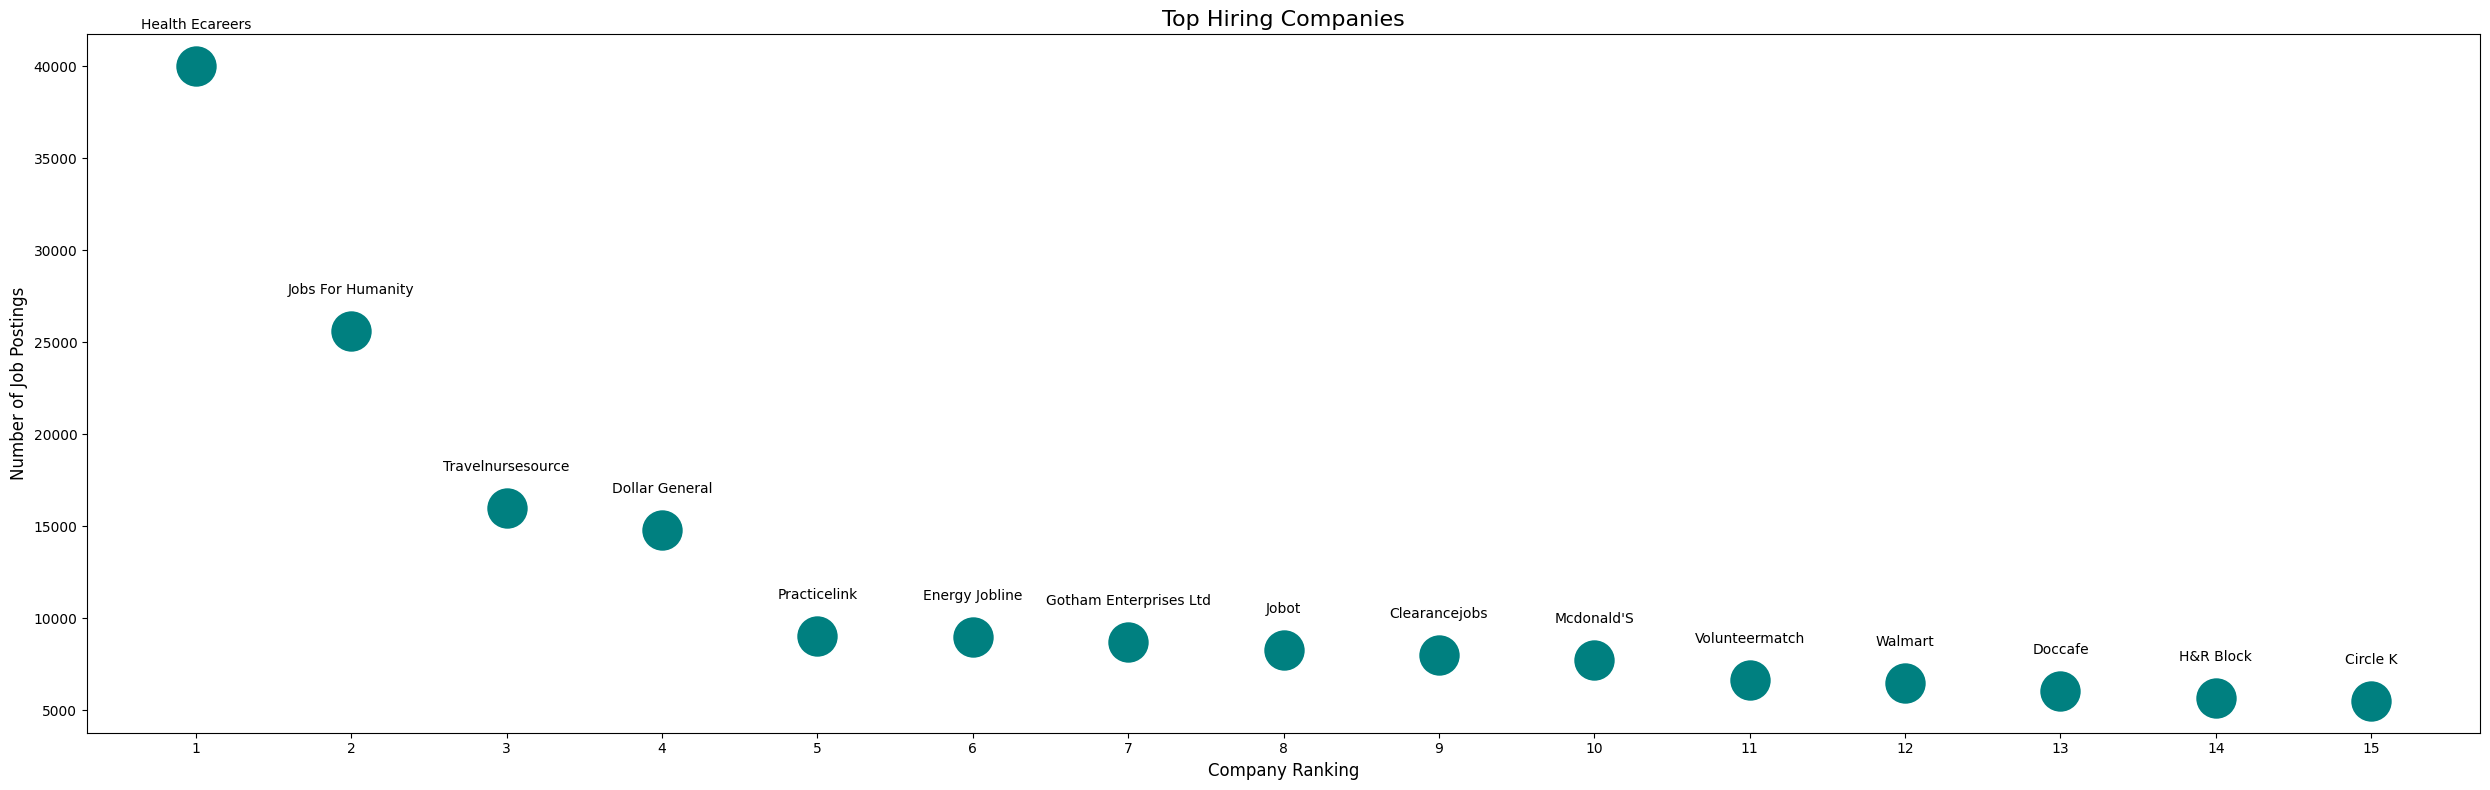

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Count number of jobs per company
company_counts = merged_df['company'].value_counts().head(15)

# Create a ranking column (1 = highest number of postings)
company_ranking = range(1, len(company_counts)+1)

# Plot scatterplot
plt.figure(figsize=(25,8))
sns.scatterplot(x=company_ranking, y=company_counts.values, s=1000, color='teal')

# Annotate company names
for i, company in enumerate(company_counts.index):
  plt.text(company_ranking[i], company_counts.values[i] + max(company_counts.values) * 0.05, company, horizontalalignment='center', fontsize=10)

plt.title("Top Hiring Companies", fontsize=16)
plt.xlabel("Company Ranking", fontsize=12)
plt.ylabel("Number of Job Postings", fontsize=12)
plt.xticks(company_ranking)
plt.tight_layout()
plt.show()